In [1]:
import pandas as pd
import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'

In [3]:
url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class={};page={};result=1;result=2;result=3;result=5;spanmin1=16+Jul+2019;spanval1=span;template=results;type={}'

In [4]:
def scrap_data(formatt, style, n_pages):
    data = []
    for page in tqdm.tqdm(range(1, n_pages)):
        new_url = url.format(formatt, page, style)
        df = pd.read_html(new_url)[2]
        data.append(df)
    data_ = pd.concat(data)
    return data_

In [5]:
odi_batting_data = scrap_data(2, 'batting', 10)
odi_batting_data.to_csv('../data/odi_batting_data_after_wc.csv')
print('1/2 done...')
odi_bowling_data = scrap_data(2, 'bowling', 10)
odi_bowling_data.to_csv('../data/odi_bowling_data_after_wc.csv')
print('2/2 done...')

100%|██████████| 9/9 [00:15<00:00,  1.68s/it]


1/2 done...


100%|██████████| 9/9 [00:14<00:00,  1.59s/it]

2/2 done...


In [6]:
batting_data = pd.read_csv('../data/odi_batting_data_after_wc.csv')
batting_data = batting_data.drop(columns=['Unnamed: 0', 'Unnamed: 15'])
# batting_data = batting_data[['Player', 'Runs', 'Ave', 'SR', '50', '100', '4s', '6s']]
batting_data.dropna(inplace=True)
batting_data.replace('-', '0', inplace=True)
batting_data['HS'] = batting_data['HS'].str.replace('*', '')
batting_data.iloc[:, 2:] = batting_data.iloc[:, 2:].astype(float)
batting_data.iloc[:, 2:7] = batting_data.iloc[:, 2:7].astype(float).astype(int)
batting_data.iloc[:, 10:] = batting_data.iloc[:, 10:].astype(float).astype(int)
batting_data

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,SD Hope (WI),2019-2022,26,26,4,1217,115,55.31,1674.0,72.70,4,7,0,110,11
1,V Kohli (INDIA),2019-2022,24,23,1,1025,120,46.59,1114.0,92.01,2,10,3,96,7
2,PR Stirling (IRE),2020-2022,22,22,1,1009,142,48.04,1213.0,83.18,4,3,0,99,26
3,KL Rahul (INDIA),2019-2022,19,19,2,930,112,54.70,954.0,97.48,3,6,0,67,28
4,S Dhawan (INDIA),2019-2022,19,17,1,804,98,50.25,900.0,89.33,0,8,0,100,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Ibrahim Zadran (AFG),2019-2019,1,1,0,2,2,2.00,9.0,22.22,0,0,0,0,0
446,D Lakshan (SL),2021-2021,1,1,0,2,2,2.00,9.0,22.22,0,0,0,0,0
447,M Prasidh Krishna (INDIA),2021-2022,7,4,3,2,2,2.00,9.0,22.22,0,0,1,0,0
448,C Viljoen (NAM),2019-2019,1,1,0,2,2,2.00,12.0,16.66,0,0,0,0,0


In [7]:
d = batting_data[batting_data['Player'].str.contains('IND')]
d = d[d['Runs'] > 0]
d

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
1,V Kohli (INDIA),2019-2022,24,23,1,1025,120,46.59,1114.0,92.01,2,10,3,96,7
3,KL Rahul (INDIA),2019-2022,19,19,2,930,112,54.70,954.0,97.48,3,6,0,67,28
4,S Dhawan (INDIA),2019-2022,19,17,1,804,98,50.25,900.0,89.33,0,8,0,100,7
10,SS Iyer (INDIA),2019-2022,20,19,1,737,103,40.94,768.0,95.96,1,7,0,71,14
18,RG Sharma (INDIA),2019-2022,15,14,0,625,159,44.64,662.0,94.41,2,2,0,79,13
29,RR Pant (INDIA),2019-2022,15,14,0,506,85,36.14,453.0,111.69,0,5,2,45,20
66,HH Pandya (INDIA),2020-2021,9,8,1,329,92,47.00,272.0,120.95,0,3,1,24,14
77,RA Jadeja (INDIA),2019-2020,15,11,6,299,66,59.80,294.0,101.70,0,2,0,19,8
94,SA Yadav (INDIA),2021-2022,7,7,2,267,64,53.40,259.0,103.08,0,2,0,33,1
131,PP Shaw (INDIA),2020-2021,6,6,0,189,49,31.50,166.0,113.85,0,0,0,32,2


In [8]:
d = d[['Player', 'Runs', 'Ave', 'SR']]
d1 = d.iloc[:9, :]
d2 = d.iloc[9:, :]
d1.loc[len(d1.index)] = ['Others ', d2.Runs.sum(), round(d2.Ave.mean(), 3), round(d2.SR.mean(), 3)]
d1['Player'] = d1['Player'].str.replace('\(INDIA\)', '')
d1

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Player,Runs,Ave,SR
1,V Kohli,1025,46.590,92.010
3,KL Rahul,930,54.700,97.480
4,S Dhawan,804,50.250,89.330
10,SS Iyer,737,40.940,95.960
18,RG Sharma,625,44.640,94.410
29,RR Pant,506,36.140,111.690
66,HH Pandya,329,47.000,120.950
77,RA Jadeja,299,59.800,101.700
94,SA Yadav,267,53.400,103.080
9,Others,1630,25.052,82.756


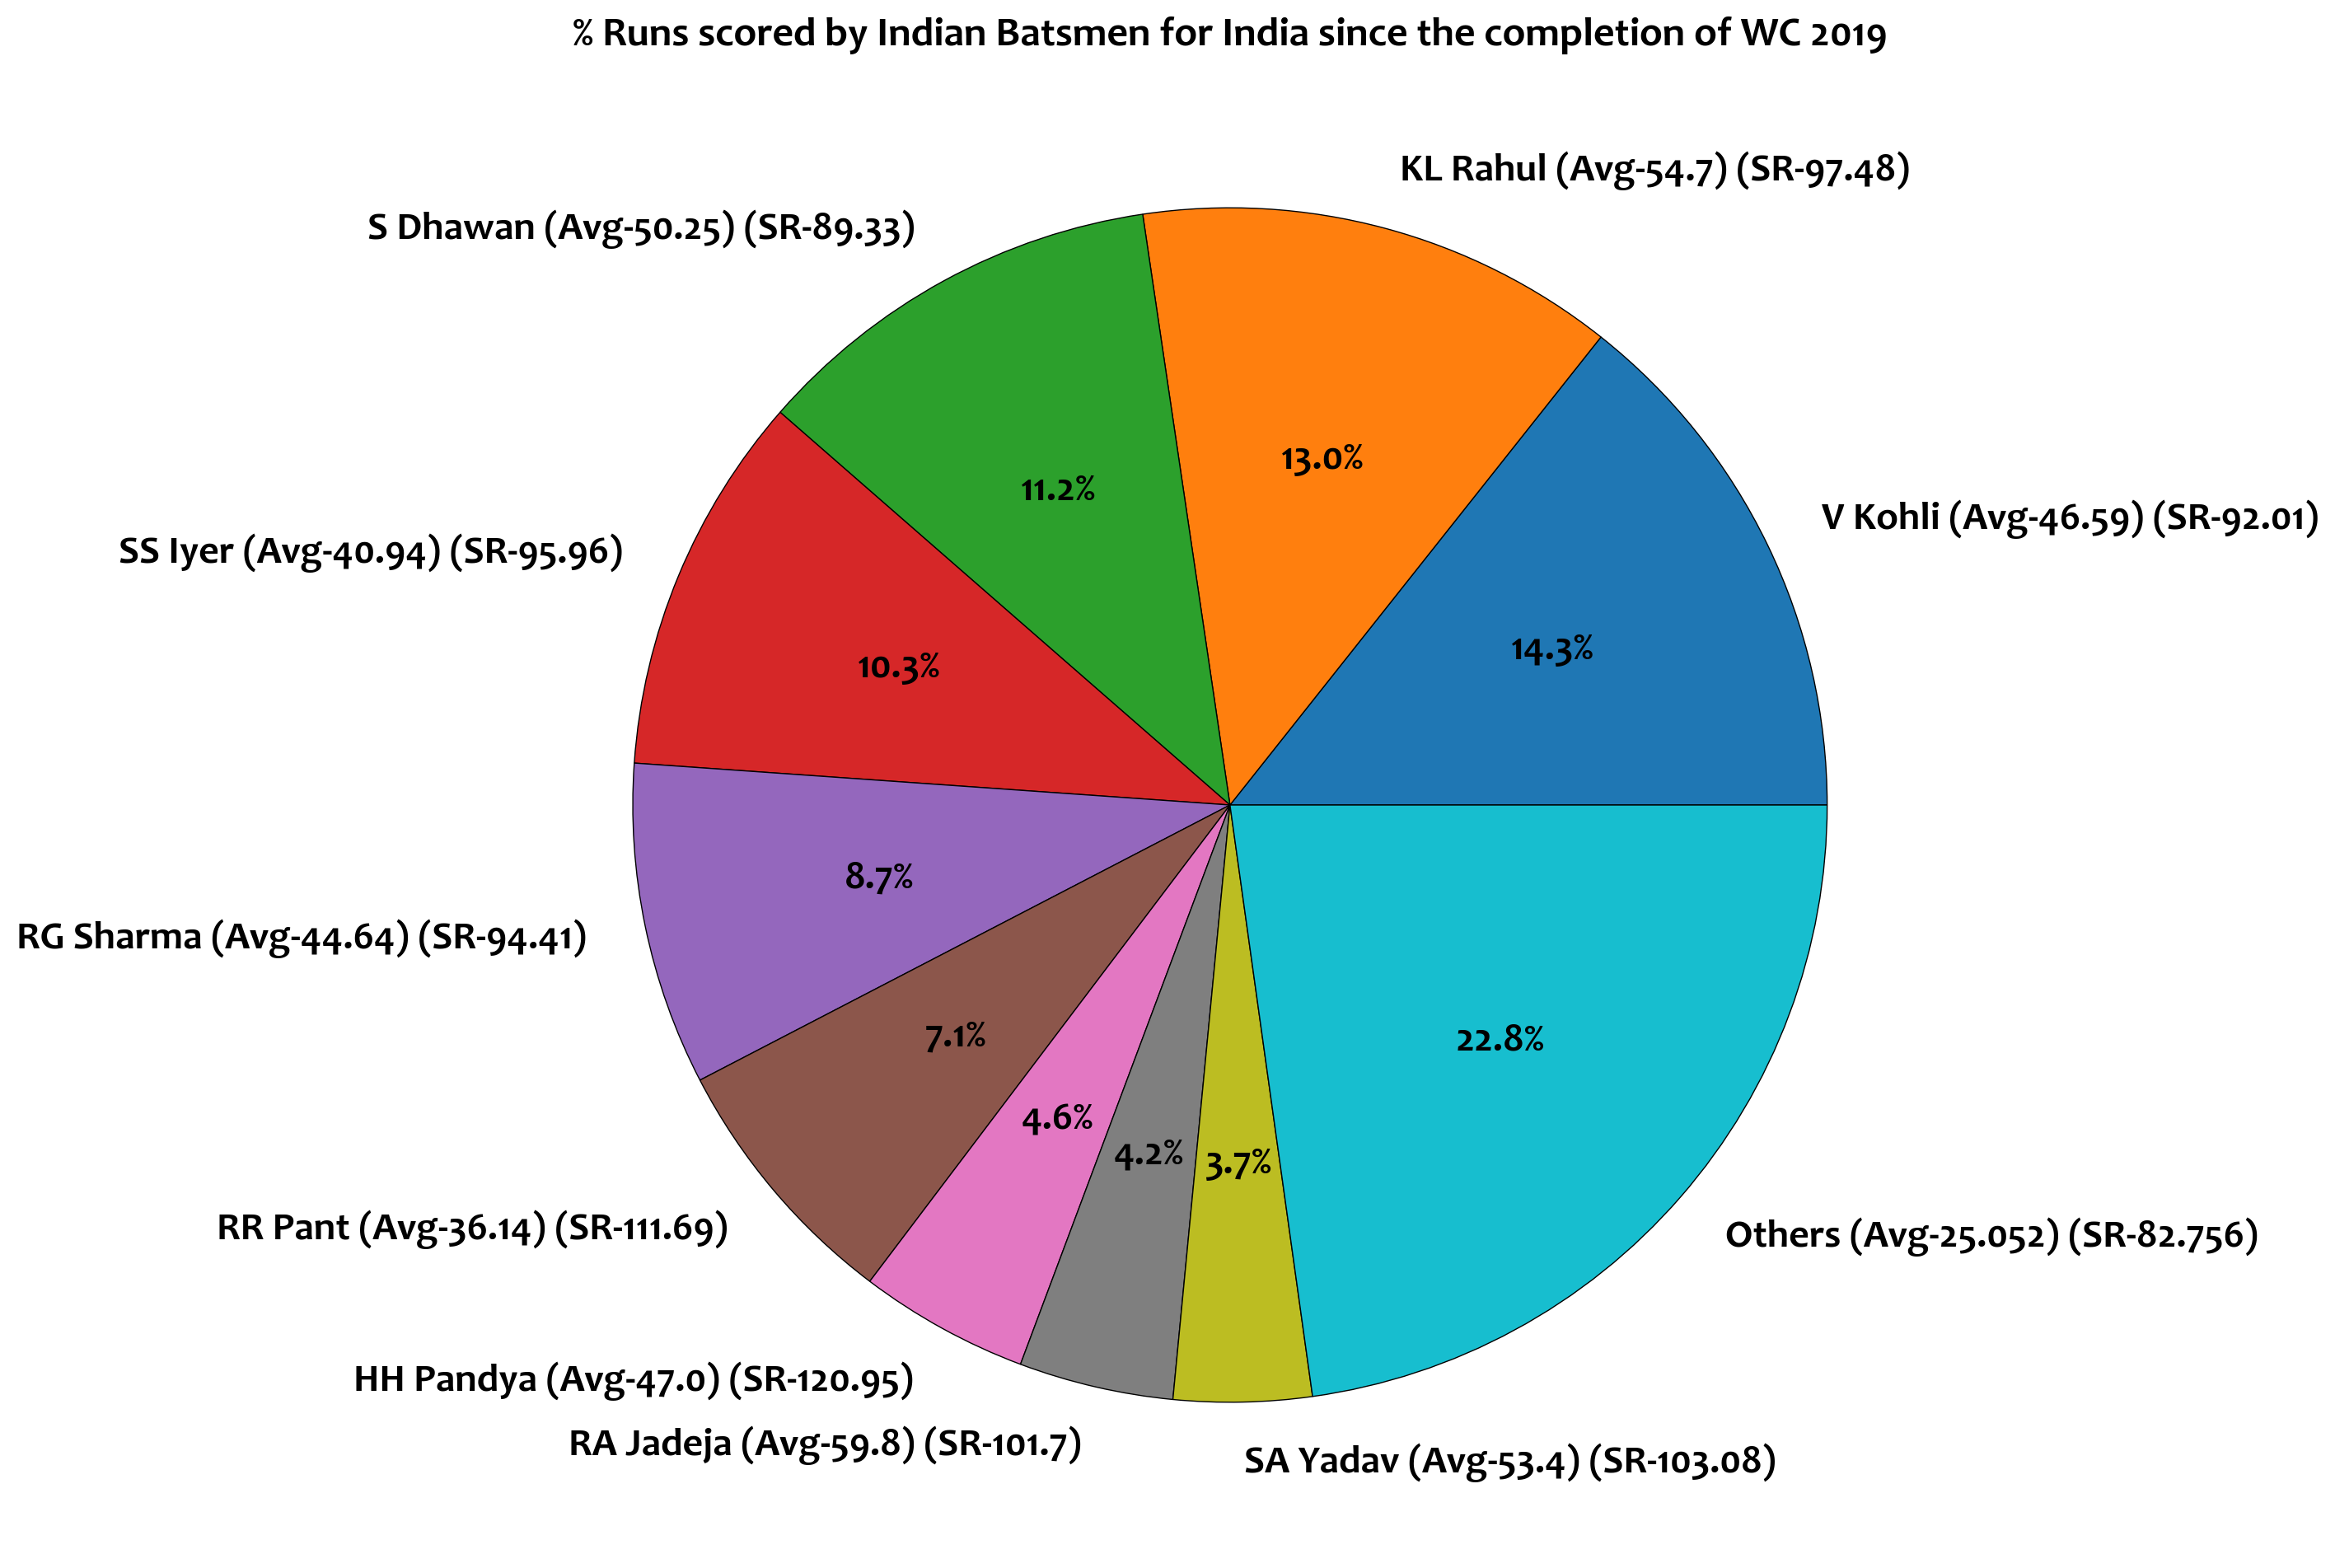

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_dpi(200)
fig.set_facecolor('white')
ax.pie(d1['Runs'], labels=d1['Player'] + '(Avg-' + d1['Ave'].astype(str) + ')' + ' (SR-' + d1['SR'].astype(str) + ')', autopct='%1.1f%%',
       wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
ax.set_title('% Runs scored by Indian Batsmen for India since the completion of WC 2019', fontsize=18)
plt.show()

In [10]:
bowling_data = pd.read_csv('../data/odi_bowling_data_after_wc.csv')
bowling_data = bowling_data.drop(columns=['Unnamed: 0', 'Unnamed: 14', 'BBI'])
bowling_data.dropna(inplace=True)
bowling_data.replace('-', '0', inplace=True)
bowling_data.iloc[:, 2:] = bowling_data.iloc[:, 2:].astype(float)
bowling_data.iloc[:, 2:4] = bowling_data.iloc[:, 2:4].astype(int)
bowling_data.iloc[:, 5:8] = bowling_data.iloc[:, 5:8].astype(int)
bowling_data.iloc[:, 11:] = bowling_data.iloc[:, 11:].astype(int)
bowling_data = bowling_data[bowling_data['Ave'].astype(float)>0]
bowling_data

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,4,5
0,AS Joseph (WI),2019-2022,27,27,238.1,12,1153,46,25.06,4.84,31.0,3,0
1,Bilal Khan (OMA),2019-2022,22,22,180.3,14,841,39,21.56,4.65,27.7,2,0
2,Zeeshan Maqsood (OMA),2019-2022,23,23,189.5,15,755,36,20.97,3.97,31.6,2,0
3,AR McBrine (IRE),2020-2022,23,21,180.0,14,787,32,24.59,4.37,33.7,2,1
4,A Zampa (AUS),2020-2021,16,16,150.2,3,752,32,23.50,5.00,28.1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,RE van der Merwe (NED),2021-2021,1,1,6.0,0,27,1,27.00,4.50,36.0,0,0
281,JM Vince (ENG),2020-2021,6,2,7.0,0,38,1,38.00,5.42,42.0,0,0
282,Waheed Ahmed (UAE),2019-2021,7,6,20.0,0,94,1,94.00,4.70,120.0,0,0
283,SG Whittingham (SCOT),2019-2019,1,1,8.0,0,50,1,50.00,6.25,48.0,0,0


In [11]:
d = bowling_data[bowling_data['Player'].str.contains('IND')]
d = d[d['Runs'] > 0]
d

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,4,5
18,Mohammed Shami (INDIA),2019-2020,12,12,100.2,4,649,21,30.90,6.46,28.6,1,0
23,YS Chahal (INDIA),2019-2022,12,12,114.5,2,640,20,32.00,5.57,34.4,1,0
28,SN Thakur (INDIA),2019-2022,14,14,115.4,4,786,19,41.36,6.79,36.5,1,0
31,M Prasidh Krishna (INDIA),2021-2022,7,7,62.1,5,301,18,16.72,4.84,20.7,2,0
42,Kuldeep Yadav (INDIA),2019-2022,15,15,138.0,1,855,16,53.43,6.19,51.7,0,0
61,B Kumar (INDIA),2019-2022,10,10,83.0,2,473,13,36.38,5.69,38.3,1,0
65,RA Jadeja (INDIA),2019-2020,15,15,128.0,1,705,12,58.75,5.50,64.0,0,0
79,JJ Bumrah (INDIA),2020-2022,12,12,115.4,4,619,10,61.90,5.35,69.4,0,0
87,DL Chahar (INDIA),2019-2022,6,6,48.0,4,276,9,30.66,5.75,32.0,0,0
131,NA Saini (INDIA),2019-2021,8,8,70.0,0,481,6,80.16,6.87,70.0,0,0


In [12]:
d = d[['Player', 'Wkts', 'Ave', 'Econ', 'SR']]
d1 = d.iloc[:9, :]
d2 = d.iloc[9:, :]
d1.loc[len(d1.index)] = ['Others ', d2.Wkts.sum(), round(d2.Ave.mean(), 3), round(d2.Econ.mean(), 3), round(d2.SR.mean(), 3)]
d1['Player'] = d1['Player'].str.replace('\(INDIA\)', '')
d1

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Player,Wkts,Ave,Econ,SR
18,Mohammed Shami,21,30.900,6.460,28.600
23,YS Chahal,20,32.000,5.570,34.400
28,SN Thakur,19,41.360,6.790,36.500
31,M Prasidh Krishna,18,16.720,4.840,20.700
42,Kuldeep Yadav,16,53.430,6.190,51.700
61,B Kumar,13,36.380,5.690,38.300
65,RA Jadeja,12,58.750,5.500,64.000
79,JJ Bumrah,10,61.900,5.350,69.400
87,DL Chahar,9,30.660,5.750,32.000
9,Others,35,49.479,5.762,49.808


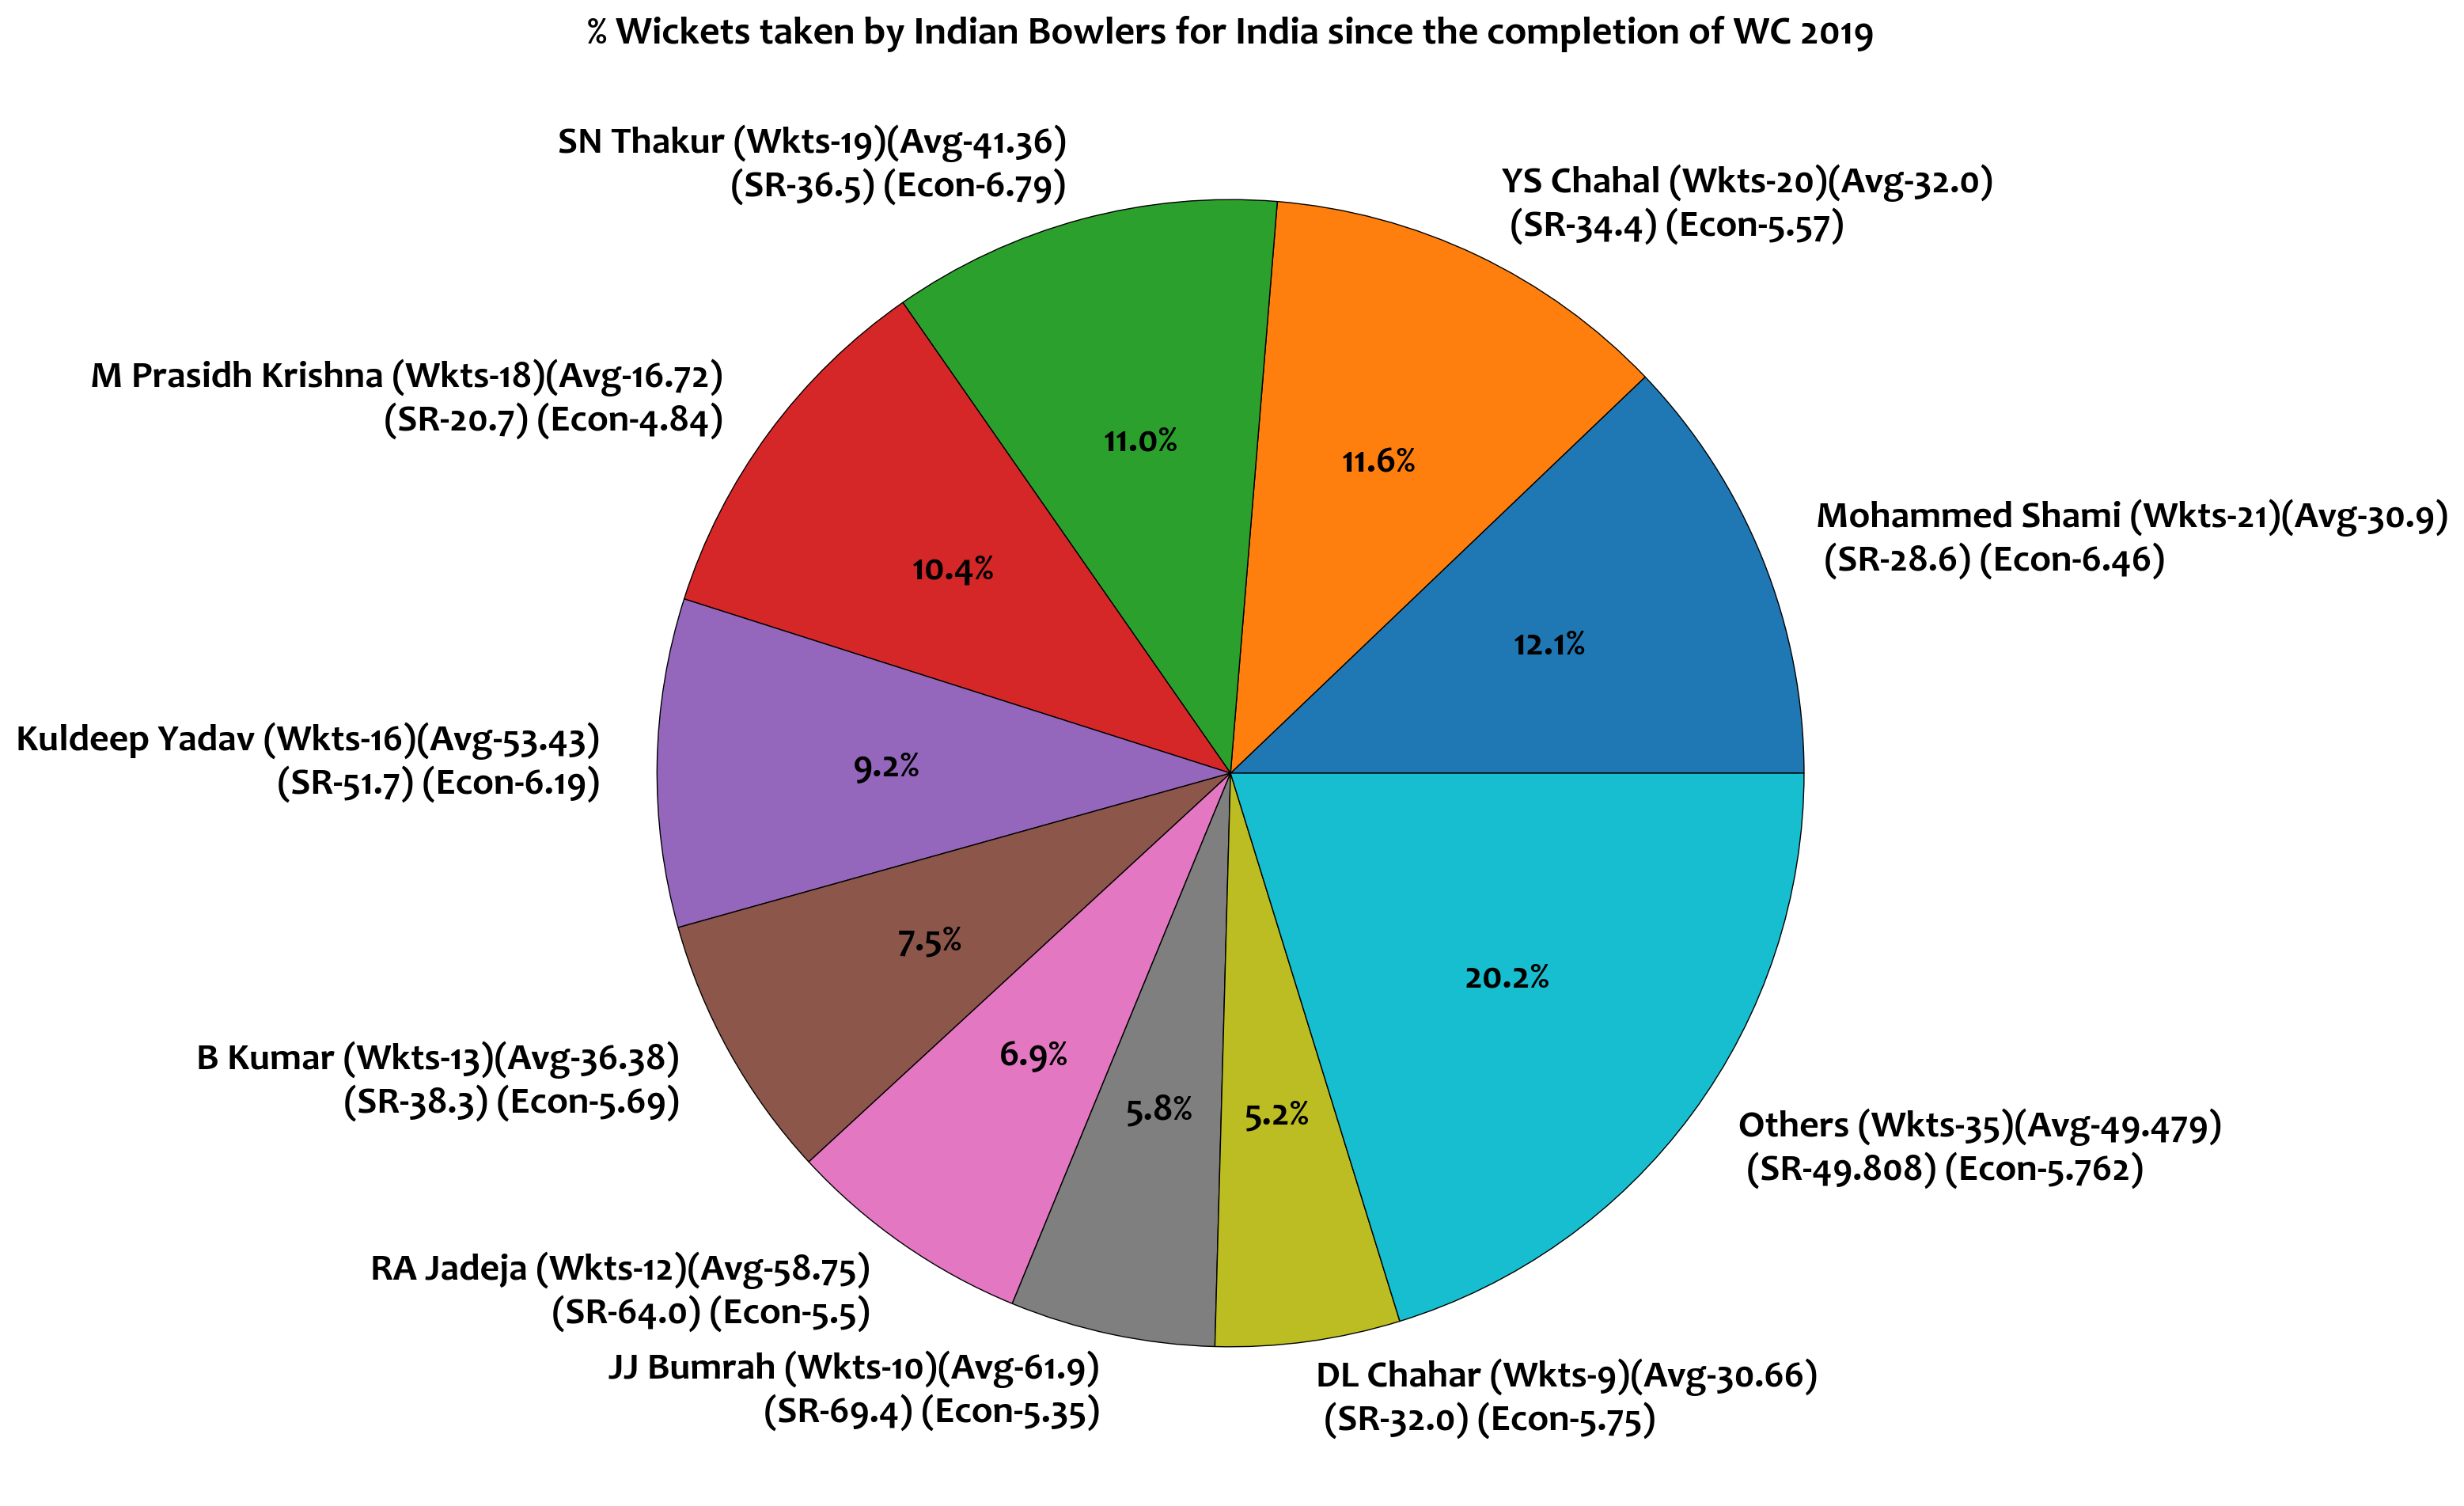

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_dpi(200)
fig.set_facecolor('white')
ax.pie(d1['Wkts'], labels=d1['Player'] + '(Wkts-' + d1['Wkts'].astype(str) + ')' + '(Avg-' + d1['Ave'].astype(str) + ')' + 
       '\n (SR-' + d1['SR'].astype(str) + ')' + ' (Econ-' + d1['Econ'].astype(str) + ')', 
       autopct='%1.1f%%',
       wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
ax.set_title('% Wickets taken by Indian Bowlers for India since the completion of WC 2019', fontsize=18)
plt.show()